Importing all libraries and reading the training and test data into dataframes.

In [0]:
"""
Created on Tue Sep 17 22:40:02 2019
@author: Esmond Dsouza
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import preprocessing

mainData = pd.read_csv("/content/drive/My Drive/Machine Learning/tcdMainData.csv")
predictionData = pd.read_csv("/content/drive/My Drive/Machine Learning/tcd ml 2019-20 income prediction test (without labels).csv")

Filling all the blank values of income to 0 in the prediction data which will be used in concatenation and splitting.

In [0]:
predictionData['Income'] = predictionData['Income'].replace(np.nan, 0)

Renaming the column to match the column name as in the prediction data.

In [0]:
mainData.rename(columns={'Income in EUR':'Income'}, inplace=True)

Checking if rows have 3 or more Nan values and dropping those rows.

In [0]:
#dropping al rows that have 3 or more NaN values
indexOfNaNRows = []
for i in range(len(mainData.index)):
    NaNCount = mainData.iloc[i].isnull().sum()
    if NaNCount >= 3:
        indexOfNaNRows.append(i)
mainData.drop(index=indexOfNaNRows, axis=0, inplace=True)

Concatenating both the training and prediction dataframe and encoding all the string values to numbers. Both the dataframes (training and prediction) are concatenated so that the encoding are in sync.

In [0]:
#concatenating the training and prediction data 
mainData.fillna(method = 'bfill', inplace=True)
combinedData = pd.concat([mainData, predictionData])

Filling up all the NaN values.

In [0]:
combinedData['Gender'] = combinedData['Gender'].apply(lambda x: 'other' if x !='male' and x !='female' else x)
combinedData['University Degree'] = combinedData['University Degree'].apply(lambda x: 'No' if x !='Master' and x !='Bachelor' and x != 'PhD' else x)
combinedData['Hair Color'] = combinedData['Hair Color'].apply(lambda x: 'Other' if x !='Black' and x !='Brown' and x != 'Blonde' and x != 'Red' else x)
combinedData['Profession'] = combinedData['Profession'].replace(np.nan, 'other')

Binning all non-categoral numeric columns.

In [0]:
#binning process for integer columns 
ageBins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
ageBinLabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
combinedData['Age'] = pd.cut(combinedData['Age'], bins=ageBins, labels=ageBinLabels)
yearBins = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
yearBinLables = ['80-85', '85-90', '90-95', '95-00', '00-05', '05-10', '10-15', '15-20']
combinedData['Year of Record'] = pd.cut(combinedData['Year of Record'], bins=yearBins, labels=yearBinLables)

Normalizing all the categoral columns using one hot encoding and splitting the pre-processed data back into training and prediction data.

In [0]:
#separating the training and prediction data after pre processing
combinedData = pd.get_dummies(combinedData, columns =['Gender', 'Country', 'Profession', 'University Degree', 'Age', 'Year of Record', 'Hair Color', 'Wears Glasses'])
combinedData.drop(columns =['Size of City', 'Body Height [cm]'], inplace= True)
transformedMainData = combinedData[combinedData.Income != 0]
transformedPredictionData = combinedData[combinedData.Income == 0]

#preparing the data for test splitting
X_transformedMainData = transformedMainData.drop(['Income', 'Instance'], axis=1)
Y_transformedMainData = transformedMainData['Income']
X_transformedPredictionData = transformedPredictionData.drop(['Income'], axis=1)

Splitting the training data into training and testing data from model evaluation.

In [0]:
#splitting sample data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_transformedMainData, Y_transformedMainData, test_size = 0.20)

Training and predicting the Bayesian Ridge Regression model to predict the outcome. Evaluating the model.

In [0]:
from sklearn import linear_model
trainingRegressor = linear_model.BayesianRidge(alpha_1=1e-07, alpha_2=1e-07, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-07, lambda_2=1e-07, n_iter=300,
       normalize=True, tol=0.001, verbose=True)
trainingRegressor.fit(X_train, Y_train)
Y_pred = trainingRegressor.predict(X_test)
df = pd.DataFrame({'Test': Y_test, 'Prediction': Y_pred})
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Root Mean Squared Error 83789.15400763242


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238148993414547.16, tolerance: 200949541146.74457
  positive)


Plotting the graph of predicted and actual income based on the trained labled data.

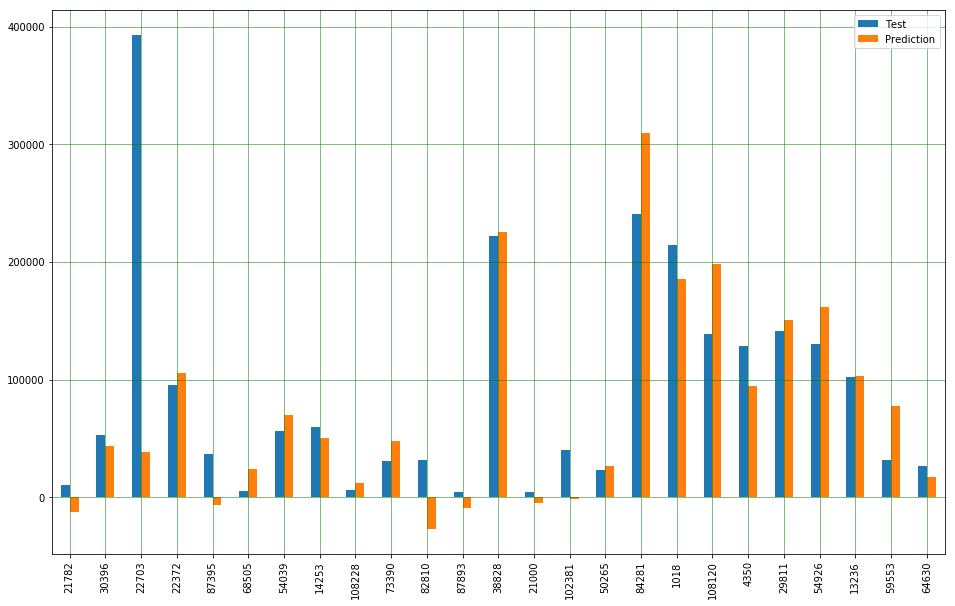

In [0]:
#plotting the graph for the first 25 values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Training the model with the actual (entire) training data and predicting the required outcome. Writing the output into a csv.

In [0]:
#training model with all the data
regressor = linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=True)  
regressor.fit(X_transformedMainData, Y_transformedMainData)

#predicting the actual data
Y_trasnformedPredictionData = regressor.predict(X_transformedPredictionData.drop(['Instance'], axis=1));
finalPredictionSheet = pd.DataFrame({'Instance': X_transformedPredictionData['Instance'], 'Income': Y_trasnformedPredictionData})
finalPredictionSheet.to_csv('/content/drive/My Drive/Machine Learning/predictedData.csv', index = None, header=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297078681565481.6, tolerance: 251161637370.18842
  positive)
